# <p style="padding: 1em; text-align: center; color: blue; background-color: #E6E6FA; border: blue 3px solid; font-family:'arial'">Solution numérique au problème de l'écoulement de Stokes <br/> autour d'un obstacle à symétrie discrète</p>

<p style="text-align:center; text-size:16pt"> <font size="4.5pt"> <b><i>ADRIEN FIORUCCI, 2016 </i></b></font> <br/><br/>
 Université Libre de Bruxelles, Master 1 en Sciences Physiques, Finalité approfondie
 </p> 

 <p style="text-align:center"><b> Résumé</b><br/><br/>
<i> Ce modeste travail se fixe pour but d'intégrer l'équation de bilan d'impulsion d'un fluide incompressible dans le modèle de l'écoulement de Stokes autour d'un obstacle à symétrie discrète, concrètement un carré. Sous ces hypothèses, il est possible de reformuler le problème comme un système linéaire couplé dont les inconnues sont la composante verticale de la vorticité et la fonction de courant, laquelle étant particulièrement bien adaptée au traitement des problèmes bidimensionnels impliquant des fluides incompressibles. Le système différentiel se compose alors de 2 équations elliptiques, qu'il nous est loisible de résoudre par la méthode classique et pédestre de Jacobi. Il nous faudra d'abord apprendre à l'ordinateur à concevoir les conditions aux bords du problème, résumées sous la proposition : "le champ de vitesse à l'infini est uniforme". Pour cela, nous résoudrons les mêmes équations dans un cadre géométrique un peu plus simple : celui de la cavité à bords mobiles (</i>lid-driven cavity<i>). En ajustant par la suite le mouvement relatif des différentes surfaces délimitant la cavité, nous pourrons modéliser précisément le champ de vitesse laminaire "loin" de l'obstacle. Nous serons enfin amenés à introduire de nouvelles conditions limites pour simuler la présence du corps rigide central, et la tâche finale sera d'intégrer les équations pour la fonction de courant dans la géométrie modifiée, laquelle donne immédiatement, par simple dérivation numérique, les valeurs du champ de vitesse en tout point, mais permet, en représentant l'ensemble de ses courbes de niveaux, d'obtenir la répartition des lignes de courant autour de l'objet... </i> </p>

 <p style="text-align:center">

Document rédigé dans le cadre d’un stage autour du phénomène
de portance auprès de Monsieur le
Professeur <b>B. Knaepen</b>
 
 </p> 

## <font color="blue" face="arial">Table des matières</font>
<hr>

<a class='s' href="#Section1" style="text-decoration:none"> <b> 1 &emsp; Modélisation des conditions limites : cavité à bords mobiles </b> </a>

&emsp;&emsp; <a class='s' href="#Section11" style="text-decoration:none"> <i> 1.1 &emsp; Formalisme de couplage vorticité-fonction de courant </i> </a>

&emsp;&emsp; <a class='s' href="#Section12" style="text-decoration:none"> <i> 1.2 &emsp; Problèmes elliptiques et méthode de Jacobi </i> </a>

&emsp;&emsp; <a class='s' href="#Section13" style="text-decoration:none"> <i> 1.3 &emsp; Conditions limites pour la vorticité  </i> </a>

&emsp;&emsp; <a class='s' href="#Section14" style="text-decoration:none"> <i> 1.4 &emsp; Procédure algorithmique et résultats  </i> </a>


<a class='s' href="#Section2" style="text-decoration:none"> <b> 2 &emsp; Ecoulement de Stokes autour d'un obstacle carré  </b> </a>

&emsp;&emsp; <a class='s' href="#Section21" style="text-decoration:none"> <i> 2.1 &emsp; Adaptation des conditions limites  </i> </a>

&emsp;&emsp; <a class='s' href="#Section22" style="text-decoration:none"> <i> 2.2 &emsp; Intégration par la méthode de Jacobi  </i> </a>

&emsp;&emsp; <a class='s' href="#Section23" style="text-decoration:none"> <i> 2.3 &emsp; Conclusions et perspectives </i> </a>

<a id="Section1"></a>
## <font color="blue" face="arial">1 &emsp;  Modélisation des conditions limites : cavité à bords mobiles</font>
<hr>

Afin d'obtenir une modélisation numérique efficace des conditions aux bords du problème, nous allons commencer par résoudre les équations de Navier-Stokes dans le cas d'une géométrie plus simple, qui est celle d'une cavité remplie de fluide flanquée de murs potentiellement mobiles. Le mouvement de ceux-ci, sous l'hypothèse d'adhérence visqueuse (_no-slip condition_), va entraîner le fluide pour lequel nous rechercherons les lignes de courant. Nous pourrons alors comparer ces dernières avec les prescriptions physiques bien établies pour cette géométrie, et valider la procédure informatique. Il suffira enfin de consentir à quelques modifications subtiles des conditions aux bords et à l'introduction de l'obstacle central pour conclure, ce qui représente alors un effort marginal... Pour être physicien, il faut avoir de la stratégie !

Pour y voir clair, nous allons d'abord tirer profit de la qualification du fluide. En effet, sous l'hypothèse d'incompressibilité, l'équation de continuité nous informe que le champ de vitesse est indivergentiel. Nous montrerons qu'il est alors possible d'introduire un champ scalaire capable de décrire la cinématique du fluide, la _fonction de courant_. En l'absence de viscosité, le théorème de Kelvin garantit la conservation de la circulation du champ de vitesse partout dans le fluide, et donc ce champ est aussi irrotationnel. Dans ce cas, la fonction de courant satisfait une équation de Laplace. En toute généralité, le rotationnel de la vitesse ne peut être trivialement posé à zéro, et représente en fait la vorticité du fluide. Cette dernière apparaît comme une source dans l'équation du second ordre pour la fonction de courant, ce qui explique la nécessité que nous ressentons de développer un formalisme de couplage entre vorticité et fonction de courant pour résoudre le problème. Nous exhiberons en particulier le caractère harmonique de la vorticité, ce qui autorise la résolution séquentielle des équations pour les deux quantités...

<a id="Section11"></a>
### <i><font color="blue" face="arial">1.1 &emsp; Formalisme de couplage vorticité-fonction de courant</font></i>

Commençons par rappeler la forme de l'équation de Navier-Stokes pour un fluide newtonien incompressible, de densité $\rho$ et de champ de vitesse $\vec{u}$ :

$$ \rho \left( \partial_t \vec{u} + (\vec{u}\cdot \vec{\nabla} ) \vec{u} \right) = - \vec{\nabla} p + \mu \nabla^2 \vec{u} $$

où $\mu$ est la viscosité du fluide, et $p$ le champ de pression généré par le mouvement du fluide. Nous étudions un écoulement de Stokes stationnaire, et pour lequel la viscosité est supposée très importante, de sorte que le nombre de Reynolds puisse être approximé à 0 et le terme advectif négligé devant le laplacien du champ de vitesse. De l'équation ci-dessus, il reste donc :

$$ \mu \nabla^2 \vec{u} = \vec{\nabla} p $$

En supposant que le champ de pression est au moins deux fois continûment dérivable, on a $\vec{\nabla} \times \vec{\nabla} p = \vec{0}$ en vertu du théorème de Schwarz, et finalement, en prenant le rotationnel de la dernière équation, il vient immédiatement

$$ \vec{\nabla} \times ( \nabla^2 \vec{u} ) = \nabla^2 ( \vec{\nabla} \times  \vec{u} ) \triangleq \nabla^2 \vec{\omega} = \vec{0}  $$

où l'on a reconnu en $\vec{\omega} = \vec{\nabla} \times  \vec{u}$ le vecteur vorticité. Le fluide étant inclus dans le plan $Span\lbrace \vec{e}_x,\vec{e}_y \rbrace$, on voit que $\vec{\omega} = \omega \: \vec{e}_z$ et donc l'équation de Navier-Stokes se ramène simplement à une équation de Laplace pour l'unique composante non-nulle de la vorticité :

$$ \nabla^2 \omega = 0 $$

L'introduction de la vorticité a non seulement permis de gagner un ordre de dérivation, mais également de réexprimer le problème de manière particulièrement commode et évidente : nous connaissons en effet une kyrielle d'algorithmes efficaces rompus à l'intégration de telles équations aux dérivées partielles. La seule énigme qu'il reste à lever réside dans l'assignation de conditions limites pour $\omega$, qui sélectionneront une solution parmi la famille à 2 paramètres de solutions de l'équation de Laplace. Celles-ci ne sont guère évidentes pour la vorticité. Pour nous sauver la mise, nous pouvons invoquer l'incompressibilité du fluide, qui, jusqu'ici, n'a joué qu'un rôle passif. En vertu de l'équation de continuité, si le fluide est incompressibe, ou de manière équivalente, la dérivée advective de la densité est nulle, le champ de vitesse est solénoïdal :

$$ \vec{\nabla} \cdot \vec{u} = 0 \Longrightarrow \partial_x u_x + \partial_y u_y = 0 $$

Cette condition est trivialement satisfaite s'il existe une fonction scalaire $\Psi (x,y) $ de classe $\mathcal{C}^2$ telle que $u_x = \partial_y \Psi$ et $u_y = -\partial_x \Psi$, car dans ce cas $\partial_{[x}\partial_{y]} \Psi = 0$, à nouveau grâce au théorème de Schwarz, et la condition d'incompressibilité est trivialement satisfaite. Le long d'une ligne de courant reliant un point $A$ à un point $B$, la valeur de l'intégrale de la 1-forme différentielle $d\Psi$ donne le flux massique du fluide qui traverse la courbe $AB$. De plus, $(\vec{u}\cdot \vec{\nabla})\Psi$ est une constante le long d'une ligne de courant, ce qui justifie l'appelation _fonction de courant_ pour $\Psi$. Les lignes de courant d'un fluide incompressible en mouvement, possédant une symétrie de translation, et dont la géométrie peut être ainsi réduite à un plan, s'obtiennent donc simplement en traçant les courbes de niveau de $\Psi$. Finalement, on remarque que la fonction de courant se couple directement à la vorticité via une équation de Poisson :

$$ \nabla^2 \Psi = \partial_x^2 \Psi + \partial_y^2 \Psi = - \partial_x u_y + \partial_y u_x = -\left(\vec{\nabla}\times \vec{u} \right) \cdot \vec{e}_z \triangleq - \vec{\omega} \cdot \vec{e}_z \triangleq -\omega $$

Les conditions limites pour $\omega$ pourront ainsi être déduites de celles pour $\Psi$, plus facilement exprimables car directement liées aux valeurs du champ de vitesse sur les bords. La solution sera finalement trouvée en intégrant numériquement le système de Poisson que voici :

<p style="border:2px; border-style:solid; border-color:blue; padding: 1em; margin-left:35%; margin-right:35%">
$$ \nabla^2 \Psi = -\omega \quad \& \quad \nabla^2 \omega = 0 $$
</p>

<a id="Section12"></a>
### <i><font color="blue"  face="arial">1.2 &emsp; Problèmes elliptiques et méthode de Jacobi</font></i>

L'équation de Poisson $\nabla^2 f(x,y) = g(x,y)$ est un cas particulièrement simple de _problème elliptique_. On rassemble sous ce vocable toute équation aux dérivées partielles du type $\mathcal{D}f(x_1,x_2) = g(x_1,x_2)$ où $\mathcal{D} = \sum_{i,j=1}^2 A_{ij} (x_1,x_2) \partial_{x_i} \partial_{x_j} + \sum_{i=1}^2 b_i (x_1,x_2) \partial_{x_i} + c(x_1,x_2)$ et $A$ est une matrice symétrique définie positive. Cette reformulation permet de comprendre qu'en fait, l'équation de Poisson n'est rien d'autre qu'un système linéaire pour l'opérateur différentiel $\mathcal{D}$ tel que $A_{ij} = \delta_{ij}$ et $b_i = c = 0 \:\forall i$. 

Il va de soi que l'usage de la force brute pour résoudre ce système pourrait s'avérer sévèrement coûteux ! L'idée de Jacobi fut de remplacer l'équation elliptique de Poisson par un problème diffusif, parabolique, en introduisant une variable horaire $t$ dans le système. Il préconisa de subsituer à $\nabla^2 f(x,y) = g(x,y)$ l'équation de diffusion suivante :

$$ \partial_t f(x,y,t) = \nabla^2 f(x,y,t) - g(x,y) $$

Ce type de problèmes relaxent vers une solution d'équilibre lorsque $t$ tend vers l'infini, atteignant de cette façon un état asymptotiquement stationnaire pour lequel $\partial_t f = 0$. Une fois à l'équilibre, la solution trouvée correspond exactement à la solution de l'équation de Poisson de départ ! 

Pour intégrer le problème numériquement, on se munit d'une grille opérant une subdivision d'un pavé fermé borné du plan euclidien à $M\times N$ cellules, $M,N\in \mathbb{N}_0$, et de dimensions $L_x \times L_y$. Cette discrétisation du domaine de définition change l'index de l'objet fonctionnel $f(x,y)$ en un index matriciel $f_{i,j}$ où $i,j$ parcourent respectivement $1 \rightarrow M$ et $1 \rightarrow N$, et de même pour tous les objets à valeurs dans ce pavé. En discrétisant la variable horaire également, les objets du type $f(x,y,t)$ prennent maintenant trois indices et s'écrivent $f_{i,j}^k$ où $k$ est appelé _indice d'itération_ pour une raison qui deviendra claire par la suite. Les pas de discrétisation sur chacune des coordonnées $x,y,t$ sont respectivement $\Delta x, \Delta y , \Delta t$. La formule d'Euler du premier ordre pour la dérivée horaire donne :

$$ \left[ \frac{\partial f}{\partial t} \right]_{i,j}^k \approx \frac{f_{i,j}^{k+1} - f_{i,j}^k}{\Delta t} $$

Ensuite, il convient de discrétiser l'opérateur laplacien lui-même, via des formules du second ordre pour la dérivée partielle seconde (remarquons que notre schéma de différentiation finie est cohérent, vu que l'ordre d'approximation le plus bas a été choisi partout) :

$$ \left[ \nabla^2 f - g \right]_{i,j}^k \approx \frac{ f_{i+1,j}^k + f_{i-1,j}^k - 2 f_{i,j}^k }{ \Delta x^2 } + \frac{ f_{i,j+1}^k + f_{i,j-1}^k - 2 f_{i,j}^k }{ \Delta y^2 } - g_{i,j} $$

En rassemblant les deux membres, il vient :

$$ \frac{f_{i,j}^{k+1} - f_{i,j}^k}{\Delta t} = 
\frac{\left(f_{i+1,j}^k + f_{i-1,j}^k\right) \Delta y^2 + \left(f_{i,j+1}^k + f_{i,j-1}^k \right) \Delta x^2 - 2 f_{i,j}^k (\Delta x^2 + \Delta y^2 ) - g_{i,j} \Delta x^2 \Delta y^2 }{\Delta x^2 \Delta y^2} $$

Et le terme en $f_{i,j}^k$ ne disparaît qu'à condition de prendre :

$$ \Delta t = \frac{\Delta x^2 \Delta y^2}{2 (\Delta x^2 + \Delta y^2)} $$

Nous avons exhibé une formule dynamique pour la fonction discrétisée au point $i,j$ en fonction des valeurs immédiatement voisines, une sorte de moyenne si l'on veut :

<p style="border:2px; border-style:solid; border-color:blue; padding: 1em; margin-left:20%; margin-right:20%">
$$f_{i,j}^{k+1}=\frac{\left(f_{i+1,j}^{k}+f_{i-1,j}^{k}\right)\Delta y^2+ \left(f_{i,j+1}^{k}+f_{i,j-1}^{k}\right)\Delta x^2-g_{i,j}^{k}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$
</p>

Dans le cas de l'équation de Laplace, il suffit bien sûr d'annuler la matrice $g_{i,j}$ partout, et le schéma de Jacobi, pour une grille carrée $\Delta x = \Delta y$, se réduit à une simple moyenne arithmétique à 4 plus proches voisins :

$$ f_{i,j}^{k+1} = \frac{1}{4} \left( f_{i+1,j}^k + f_{i-1,j}^k +  f_{i,j+1}^k + f_{i,j-1}^k \right) $$

<a id="Section13"></a>
### <i><font color="blue"  face="arial">1.3 &emsp; Conditions limites pour la vorticité</font></i>

<font color="blue"  face="arial"><b> Schémas de différences finies à 4 points </b></font> $\quad$ Commençons par établir une formule à 4 points pour la dérivée première. L'erreur de discrétisation est alors d'ordre 4, ce qui permet d'assurer une précision suffisante sur l'imposition des conditions aux bords. Soit une fonction d'une variable discrétisée $\lbrace x_i \rbrace$ notée $f_i$ aux points de grille. Le pas de discrétisation est noté $h$. On peut alors utiliser le théorème de Taylor pour trois accroissements différents, et se restreindre au troisième ordre :

$$ f_{i-2} = f_i - 2 f'_i h + 2 f''_i h^2 - \frac{4}{3} f'''_i h^3 + \mathcal{O}(h^4) \quad (1) $$
$$ f_{i-1} = f_i - f'_i h + \frac{1}{2} f''_i h^2 - \frac{1}{6} f'''_i h^3 + \mathcal{O}(h^4) \quad (2) $$
$$ f_{i+1} = f_i + f'_i h + \frac{1}{2} f''_i h^2 + \frac{1}{6} f'''_i h^3 + \mathcal{O}(h^4) \quad (3) $$

La combinaison linéaire $(1) - 4\times (2) + 4 \times (3)$ permet d'éliminer le terme en dérivée troisième. Il suffit alors d'isoler le terme $6h\:f'_i$ pour démontrer que :

$$ f'_i = \frac{1}{6h} \left[ f_{i-2} - 6 f_{i-1} + 3 f_i + 2 f_{i+1} \right] + \mathcal{O}(h^3) \quad (S1) $$

Qui est le schéma pseudo-progressif à quatre points pour la dérivée première. Nous devrons également nous munir d'une formule pseudo-rétrograde pour cette même dérivée. Un raisonnement tout à fait similaire à celui que nous venons d'élaborer conduit à :

$$ f'_i = -\frac{1}{6h} \left[ f_{i+2} - 6 f_{i+1} + 3 f_i + 2 f_{i-1} \right] + \mathcal{O}(h^3) \quad (S2) $$


<font color="blue" face="arial"><b> Conditions limites pour la fonction de courant </b></font> $\quad$ Après cette dérivation apéritive, concentrons-nous sur la physique inhérente à la géométrie du problème. La cavité qui renferme le fluide est supposée posséder 4 murs mobiles, ne se déplaçant que dans la direction $x$, et dont les vitesses sont définies sur la figure ci-dessous :

<img src="boundaries.gif",width="600px">

Sous hypothèse de non-glissement du fluide sur les plaques (la force de friction responsable de cette propriété étant bien entendu d'origine visqueuse), la vitesse du fluide sur le bord supérieur de la grille doit être partout horizontale et de module égal à $U_T$. On a donc $\vec{u}_{M,j} = (U_T,0)$. En bas, on a une définition symétrique pour $\vec{u}_{1,j} = (U_B,0)$. Pour la fonction de courant :
* Dans le cas où $U_H = 0$, au voisinage des bordures, le champ de vitesse du fluide est partout tangent. Ces bords deviennent alors une ligne de courant fermée. Dans ce cas, $\Psi$ y est constante, et on peut raisonnablement choisir $\Psi = 0$, vu que les quantités physiques que sont les composantes de $\vec{u}$ ne dépendent pas de ce choix.
* Au contraire, si $U_H \neq 0$, en intégrant $\vec{\nabla}\Psi = (0,U_H)$ sur les bords latéraux, on aura directement $\Psi_{i,1} = \Psi_{i,N} = U_H y_i$. On retrouve bien le fait que la différence $\Psi_T - \Psi_B$ équivaut à $U_H\times L_y$, c'est-à-dire le flux traversant la surface $x=0$. Sur les bords horizontaux, le fluide s'écoule de manière uniforme et on doit toujours avoir la même valeur pour $\Psi_T - \Psi_B$. Donc $\Psi_{1,j} = 0$ par choix, et $\Psi_{M,j} = (\Psi_T - \Psi_B) + \Psi_{1,j} = U_H\times L_y$.

<font color="blue" face="arial"><b> Condition limite pour $\omega$ sur le bord supérieur </b></font> $\quad$ Pour tous les points de grille $(M,1 \rightarrow N)$, on a que $\partial_y \Psi_{M,j} = U_T$ par définition de la fonction de courant. En remplaçant le premier membre par son expression discrétisée $(S1)$, on arrive aisément à montrer que :

$$ \Psi_{M+1,j} = 3U_T \Delta y - \frac{1}{2}\Psi_{M-2,j} + 3 \Psi_{M-1,j} - \frac{3}{2} \Psi_{M,j} $$

On utilise l'équation de Poisson pour connecter ceci à la valeur de la vorticité au bord :

$$ \nabla^2 \Psi_{M,j} = \partial_x^2 \Psi_{M,j} + \partial_y^2 \Psi_{M,j} = \partial_y^2 \Psi_{M,j} = - \omega_{M,j} \Longrightarrow \omega_{M,j} = -\frac{\Psi_{M+1,j} + \Psi_{M-1,j} - 2\Psi_{M,j}}{\Delta y ^2}$$

où l'on a utilisé le fait que $\partial_x^2 \Psi = -\partial_x u_y = 0$. La valeur de la fonction de courant au point $(M+1,j)$, hors du domaine, est éliminée en utilisant l'équation que nous venons de dériver pour cette quantité, il vient donc finalement :

$$ \omega_{M,j} = -\frac{3 U_T}{\Delta y} + \frac{\Psi_{M-2,j} - 8 \Psi_{M-1,j} + 7\Psi_{M,j}}{2\Delta y^2} \quad (B1) $$


<font color="blue" face="arial"><b> Condition limite pour $\omega$ sur le bord inférieur </b></font> $\quad$ Pour tous les points de grille $(1,1 \rightarrow N)$, on a que $\partial_y \Psi_{1,j} = U_B$. Nous ne pouvons plus utiliser le schéma $(S1)$, car les points d'index négatifs ne sont pas définis. Nous le remplaçons par le schéma progressif $(S2)$ pour exprimer la dérivée partielle $\partial_y \Psi$, et on extrait cette fois :

$$ \Psi_{0,j} = -3U_B \Delta y - \frac{1}{2}\Psi_{3,j} + 3 \Psi_{2,j} - \frac{3}{2} \Psi_{1,j} $$

Nous permettant ainsi d'éliminer le point $(0,j)$ dans la définition du laplacien intervenant dans le calcul de la vorticité. Un calcul d'ailleurs en tout point similaire à celui esquissé ci-dessus, et qui se résume à quelques manipulations algébriques évidentes. La condition sur le bord inférieur est donc, sans surprise :

$$ \omega_{1,j} = +\frac{3 U_B}{\Delta y} + \frac{\Psi_{3,j} - 8 \Psi_{2,j} + 7\Psi_{1,j}}{2\Delta y^2} \quad (B2) $$


<font color="blue" face="arial"><b> Condition limite pour $\omega$ sur le bord gauche </b></font> $\quad$ De l'équation $\partial_x \Psi_{i,1} = -v_{i,1} = 0$, on extrait immédiatement, par un calcul analogue à celui qui nous a conduit vers $(B2)$, la valeur de la fonction de courant un point en dehors du domaine : 

$$\Psi_{i,0} = -\frac{1}{2} \Psi_{i,3} + 3 \Psi_{i,2} - \frac{3}{2} \Psi_{i,1} $$

Vu que $\partial_y u_{i,1} = 0$ pour tout $i$, il ne reste qu'un terme différentiel dans l'équation de Poisson et :

$$ \omega_{i,1} = - \frac{\Psi_{i,2} + \Psi_{i,0} - 2\Psi_{i,1}}{\Delta x^2} = \frac{\Psi_{i,3} - 8\Psi_{i,2} + 7\Psi_{i,1}}{2\Delta x^2} \quad (B3) $$


<font color="blue" face="arial"><b> Condition limite pour $\omega$ sur le bord droit </b></font> $\quad$ En suivant une procédure analogue, mais en utilisant cette fois la formule donnant $\Psi$ au point hors du domaine que nous avons dérivée dans la démonstration de l'équation $(B1)$, c'est-à-dire en tirant profit du schéma rétrograde plutôt que progressif, il vient :

$$ \omega_{i,N} = \frac{\Psi_{i,N-2} - 8\Psi_{i,N-1} + 7\Psi_{i,N}}{2\Delta x^2} \quad (B4) $$

Les équations désignées par $(B1)-(B4)$ forment l'ensemble des conditions aux bords pour $\omega$ qu'il conviendra d'implémenter lorsqu'il nous faudra résoudre l'équation de Laplace pour la vorticité... On remarque qu'il s'agit simplement de combinaisons linéaires des valeurs de la fonction de courant, aux points voisins tous intérieurs au domaine. Nous avons donc atteint notre but : utiliser le couplage entre $\Psi$ et $\omega$ pour exhiber des conditions limites aisément exprimables pour la seconde fonction...

<a id="Section14"></a>
### <i><font color="blue" face="arial">1.4 &emsp; Procédure algorithmique et résultats</font></i>

Pour résoudre le problème numériquement dans le cadre de la formulation de couplage $\Psi/\omega$, nous avons implémenté l'algorithme suivant :
* **Etape 1** $-$ Définir la grille d'intégration, initialiser les matrices $\omega_{i,j}$ et $\Psi_{i,j}$ et appliquer les conditions aux bords pour $\Psi_{i,j}$ ;
* **Etape 2** $-$ Appliquer les conditions aux bords pour la vorticité en fonction des valeurs de $\Psi_{i,j}$ ;
* **Etape 3** $-$ Mettre à jour $\omega_{i,j} \rightarrow \omega^{maj}_{i,j}$ grâce à la formule de Jacobi ;
* **Etape 4** $-$ Injecter les nouvelles valeurs de la vorticité dans l'équation de Poisson pour la fonction de courant, et mettre à jour la fonction de courant $\Psi_{i,j} \rightarrow \Psi^{maj}_{i,j}$ par la formule de Jacobi ;
* **Etape 5** $-$ Calculer l'écart en norme $L2$ entre les matrices initiales et les matrices mises à jour (à la fois pour $\omega$ et $\Psi$). L'erreur numérique est définie comme la plus grande de ces deux valeurs ;
* **Etape 6** $-$ Si l'erreur numérique a atteint une valeur suffisament petite, interrompre la procédure et présenter les résultats. Sinon, retourner à l'_étape 2_.

Voici le code :

In [37]:
# Importation de fonctions mathématiques et définitions des styles pour les graphes
import numpy 
from math import sqrt
import matplotlib.pyplot as pyplot 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import clear_output
from matplotlib.patches import Rectangle
import time
%matplotlib inline

def log_2D(x, y) :
    pyplot.figure(figsize=(9,9))
    pyplot.semilogy(x, y, 'r')
    pyplot.xlabel('Nombre d´itérations',fontsize=18)
    pyplot.ylabel('Norme 2 de l´erreur',fontsize=18)
    pyplot.grid('on')
    
def niveau(x, y, z, N) :
    pyplot.figure(figsize=(11,9))
    pyplot.contourf(x,y,z,N, cmap = cm.Blues, antialiased = True)
    pyplot.xlabel('Coordonnée X',fontsize=18)
    pyplot.ylabel('Coordonnée Y',fontsize=18)
    pyplot.colorbar()


1 - Temps total d'exécution : 0.10937356948852539 secondes 

2 - Norme matricielle L2 de l'erreur numérique : 9.969435255173338e-07

3 - Nombre d'itérations effectuées : 1257

4 - Lignes de courant : 
    -------------------


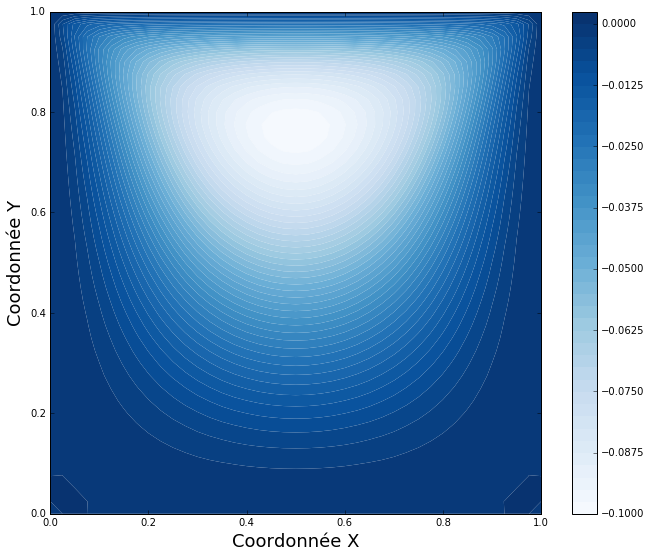

In [92]:
## =================================================================================
## Résolution du problème de l'écoulement de Stokes dans une cavité à parois mobiles
## =================================================================================


## 1. Initialisation
## -----------------
start_time = time.time()
print("Calculs en cours")

# Définition de la grille
Nx = 40 +1         # Nombre de cellules sur X + 1 (hauteur des matrices)
Ny = 40 +1         # Nombre de cellules sur Y + 1 (largeur des matrices)
Lx = 1.0           # Longueur [adimensionnelle] sur X
Ly = 1.0           # Longueur [adimensionnelle] sur Y
Dx = Lx/(Nx-1)     # Incrément sur X
Dy = Ly/(Ny-1)     # Incrément sur Y
tol = 10.**(-6)    # Erreur maximale autorisée
Ntot = 10**4       # Nombre d'itérations maximales (Inf si néant)

# Vitesses horizontales des parois (> 0 vers les x > 0) [adimensionnelles]
UH = 0.0 # Vitesse de poussée des plaques latérales (= car incompressible)
UT = 1.0 # Vitesse tangentielle de la plaque supérieure (top)
UB = 0.0 # VItesse tangentielle de la plaque inférieure (bottom)

## 2. Définition des observables physiques
## ---------------------------------------

# Fonction de courant Psi(x,y) discrétisée sur la grille
Psi = numpy.zeros((Ny,Nx))
Psi_maj = Psi.copy() # Matrice temporaire pour Jacobi
# Composante verticale w(x,y) de la vorticité discrétisée sur la grille
w = numpy.zeros((Ny,Nx))
w_maj = w.copy() # Matrice temporaire pour Jacobi

# Application des conditions aux bords sur la fonction de courant
#for j in range(0,Nx-1):
#    Psi_maj[:,j] = UH*Dy*numpy.linspace(0,Ny-1,Ny)
for j in (0,Nx-1) :
    Psi[:,j] = UH*Dy*numpy.linspace(0,Ny-1,Ny) # Bords latéraux
Psi[0,:] = 0
Psi[-1,:] = UH*Ly
# Si UH = 0, on a bien Psi = 0 partout au début, notamment sur le bord.

## 3. Méthode de Jacobi
## --------------------

L2err = 1 # Valeur initiale de l'erreur
erreur = numpy.zeros(Ntot)
k = 0 # Compteur d'itérations

while (L2err > tol and k < Ntot) :
    
    k = k + 1 
    
    # Conditions aux bords pour w
    
    # - Bordures supérieure et inférieure
    w_maj[Ny-1,:] = (-3*UT/Dy) + ((Psi[Ny-3,:] - 8*Psi[Ny-2,:] + 7*Psi[Ny-1,:])/(2*Dy**2))  # (B1)
    w_maj[0,:]  = (+3*UB/Dy) + ((Psi[2,:] - 8*Psi[1,:] + 7*Psi[0,:])/(2*Dy**2)); # (B2)
    
    # - Bordures gauche et droite
    w_maj[:,0] = (Psi[:,2] - 8*Psi[:,1] + 7*Psi[:,0])/(2*Dx**2) # (B3)
    w_maj[:,Nx-1] = (Psi[:,Nx-3] - 8*Psi[:,Nx-2] + 7*Psi[:,Nx-1])/(2*Dx**2) # (B4)
  
    # Résolution de l'équation de Laplace pour w
    w_maj[1:-1,1:-1] = ((w[2:,1:-1] + w[:-2,1:-1])*Dy**2 + (w[1:-1,2:] + w[1:-1,:-2])*Dx**2) \
                        / (2*(Dx**2 + Dy**2))

    L2errW = numpy.sqrt(numpy.sum((w_maj - w)**2))/(Nx*Ny) # Norme 2 de Delta(w)
    
    w = w_maj.copy(); # Préparation de l'itéré suivant
            
    # Résolution de l'équation de Poisson pour Psi
    Psi_maj[1:-1,1:-1] = ( ((Psi[2:,1:-1] + Psi[:-2,1:-1])*Dy**2) + \
                            ((Psi[1:-1,2:] + Psi[1:-1,:-2])*Dx**2) + w[1:-1,1:-1]*(Dx*Dy)**2 ) \
                            / (2*(Dx**2 + Dy**2))
        
    L2errPsi = numpy.sqrt(numpy.sum((Psi_maj - Psi)**2))/(Nx*Ny) # Norme 2 de Delta(Psi)
    
    Psi = Psi_maj.copy() # Préparation de l'itéré suivant
    
    # Calcul de l'erreur numérique
    L2err = max([L2errW,L2errPsi])
    erreur[k-1] = L2err


## 4. Graphiques et résultats
## --------------------------

# Sorties numériques
clear_output()
DeltaT = time.time() - start_time
print("\n1 - Temps total d'exécution : " + repr(DeltaT) + " secondes \n")
print("2 - Norme matricielle L2 de l'erreur numérique : " + repr(L2err) + "\n")
print("3 - Nombre d'itérations effectuées : " + repr(k) + "\n")

#Sorties graphiques
print("4 - Lignes de courant : \n    -------------------")
x = numpy.linspace(0,1,Nx)
y = numpy.linspace(0,1,Ny)
niveau(x,y,Psi,40)


5 - Erreur numérique : 
    ------------------



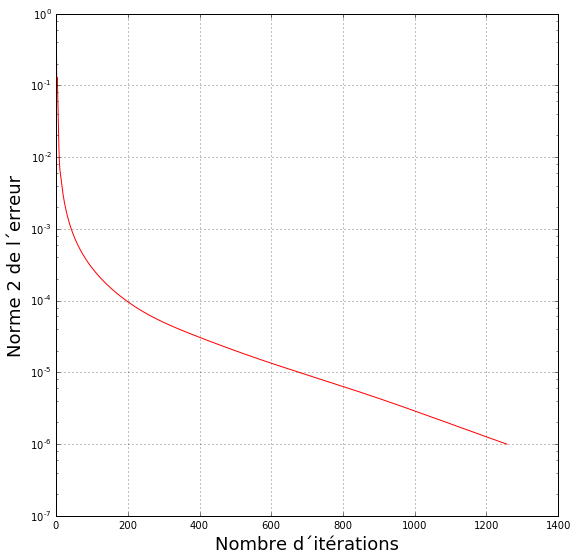

In [10]:
print("\n5 - Erreur numérique : \n    ------------------\n")
log_2D(numpy.arange(k)+1,erreur[:k])

En exécutant la cellule, on se rend aisément compte que le _pattern_ est bien correct, et conforme à l'intuition. De plus, la courbe de convergence est asymptotiquement une droite en représentation semi-logarithmique, comme on peut s'y attendre pour un algorithme de relaxation basé sur la formule de Jacobi. Ces conclusions permettent _in fine_ de valider notre code ; nous pouvons ainsi poursuivre en entamant sans plus attendre la résolution du problème de départ...

<a id="Section2"></a>
## <font color="blue" face="arial">2 &emsp; Ecoulement de Stokes autour d'un obstacle carré</font>
<hr>

<a id="Section21"></a>
### <i><font color="blue" face="arial">2.1 &emsp; Adaptation des conditions limites</font></i>

<font color="blue" face="arial"><b>Exploitation de la symétrie</b></font> $\quad$ Il est temps d'ajouter l'obstacle central à symétrie discrète. Nous choisirons un carré, vu que cette figure géométrique partage déjà les symétries de la cavité à bords mobiles, pour laquelle le _pattern_ de l'écoulement vient d'être trouvé. Les principes sont ici très simples, il s'agit simplement de :
* Définir une valeur adéquate pour $\Psi$ sur le bord du carré ;
* Imposer la condition de non-glissement sur le bord en y adaptant les valeur de la vorticité.

La seconde tâche a déjà été décrite et implémentée pour les bords du domaine, il ne reste donc qu'à opérer une savante duplication des lignes de code en question. Le choix de la valeur pour $\Psi$ sur les parois du carré relève d'un autre défi. On pourrait naïvement penser que $\Psi = 0$ soit une proposition correcte, dans la mesure où elle interdit un flux net de fluide à travers les parois du cube. Mais ceci n'est pas satisfaisant, car nous savons que la bordure inférieure du domaine porte aussi comme valeur $\Psi = 0$. Sans s'en rendre compte, on interdit alors au fluide de se propager dans le trapèze inférieur, dont les deux bases sont respectivement le bord inférieur du domaine et le bord inférieur du carré lui-même. Une manière plus rigoureuse de penser est donc d'exploiter la symétrie _supposée_ de la solution finale en remarquant que le bord du cube est le prolongement de la ligne de courant qui le rencontre à gauche et à droite au milieu des faces. Cette ligne de courant est en fait un axe de symétrie-miroir du problème, et après avoir été initialisée en flux continu, elle ne doit, ni ne peut plus être modifiée. Supposons que la valeur (constante) de la fonction de courant sur cette ligne de courant soit $\Psi_{axe}$, alors la condition au bord correcte sur les parois est du cube devra être $\Psi = \Psi_{axe}$ !

Remarquons cependant que nous avons deviné, grâce à la symétrie, la forme de la solution. Il est par ailleurs évident que cette même symétrie devrait jaillir d'elle-même de la solution finale. Nous expliquerons plus tard les motifs nous engageant à croire qu'il serait assez malaisé d'adapter l'algorithme ci-dessus pour tenir compte de cette difficulté. Néanmoins, il nous paraît judicieux, à ce stade, de donner quelques arguments théoriques, et indépendants d'une supputation quelconque sur la symétrie discrète du _pattern_ d'écoulement final, démontrant finalement que $\Psi_{axe}$ est la valeur qu'il faut appliquer sur les parois du carré pour reproduire le comportement naturel du fluide...

<font color="blue" face="arial"><b>Quelques mots d'explication...</b></font> $\quad$ La fixation de la condition de bord "à la main" est une conséquence assez désagréable de la formulation du problème que nous avons proposée. Pour voir ce qu'il se passe effectivement, il est nécessaire de remonter jusqu'aux équations de Navier-Stokes originelles :

$$ \Delta \vec{u} = -\vec{\nabla} p $$

Vu qu'il faut prendre le rotationnel membre à membre pour obtenir le système de Poisson que nous résolvons, il est évident que l'ajout du gradient d'un champ scalaire $\phi$ quelconque ne change absolument rien :

$$ \Delta \vec{u} = -\vec{\nabla} p + \vec{\nabla} \phi $$

Le premier membre se réduit à $-\vec{\nabla} \times (\vec{\nabla} \times \vec{u}) = -\vec{\nabla} \times \vec{\omega}$ par incompressibilité. On peut alors intégrer membre à membre sur un contour $\mathcal{C}$ fermé orienté positivement qui encercle l'obstacle central :

$$ -\int_{\mathcal{C}} (\vec{\nabla} \times \vec{\omega}) \cdot \vec{d\ell} = -\int_{\mathcal{C}} \vec{\nabla} p \cdot \vec{d\ell} + \int_{\mathcal{C}} \vec{\nabla} \phi \cdot \vec{d\ell} = 0 + \int_{\mathcal{C}} \vec{\nabla} \phi \cdot \vec{d\ell} $$

car en toute généralité, rien n'indique que $\phi$ soit monovalué lorsqu'on effectue une circulation sur $\mathcal{C}$. Toute fonction purement azimutale $\phi = \phi(\theta )$ sera toujours multivaluée une infinité dénombrable de fois. C'est précisément une telle fonction qu'il faudrait rajouter au système pour obtenir le comportement pathologique de départ. En effet, si on rajoute une force de la forme $\vec{f} = f \vec{e_{\theta}}$, on peut créer un contreflux dans le trapèze inférieur au cube, et obtenir un _pattern_ similaire à celui qui sort naturellement de l'intégrateur lorsque l'on impose la mauvaise condition au bord $\Psi = 0$ sur les parois de l'obstacle. On voit donc que la circulation de $\phi$ autour de l'obstacle, et les conditions aux bords sur ce même obstacle sont corrélées.

Si on définit $\vec{dS}$ partout normal à $\vec{d\ell}$ le long de $\mathcal{C}$ et orienté de manière à pointer vers l'extérieur de la surface sous-tendue par le contour, on voit que le rotationnel de la vorticité peut se réexprimer comme un gradient de sa seule composante verticale :

$$ \int_{\mathcal{C}} \vec{\nabla} \omega \cdot \vec{dS} = \int_{\mathcal{C}} \vec{\nabla} \phi \cdot \vec{d\ell} $$

Idéalement, il devrait être possible de connecter, grâce à cette équation intégrale, le comportement du champ $\phi$ et la valeur de $\Psi$ sur le bord de l'obstacle. Ensuite, en faisant tendre $\phi$ vers 0 partout, on pourrait espérer voir émerger la condition $\Psi = \Psi_{axe}$ sur la frontière de ce dernier... Nous avons hélas manqué de temps pour réaliser ce calcul, et nous promettons de publier rapidement un _addenda_ au présent manuscrit qui comblera cette lacune. Par contre, il nous sera possible de vérifier que notre intégrateur propose une solution satisfaisant bien à :

$$ \int_{\mathcal{C}} \vec{\nabla} \omega \cdot \vec{dS} = 0 $$

ce qui est, somme toute, suffisamment encourageant et permet de nous rassurer quant à la validité de la procédure.

<a id="Section22"></a>
### <i><font color="blue" face="arial">2.2 &emsp; Intégration par la méthode de Jacobi</font></i>

Nous appliquons les quelques modifications introduites ci-dessus à notre algorithme de Jacobi...


1 - Temps total d'exécution : 0.4999985694885254 secondes 

2 - Norme matricielle L2 de l'erreur numérique : 9.8892498863085447e-15

3 - Nombre d'itérations effectuées : 3922

4 - Lignes de courant : 
    -------------------


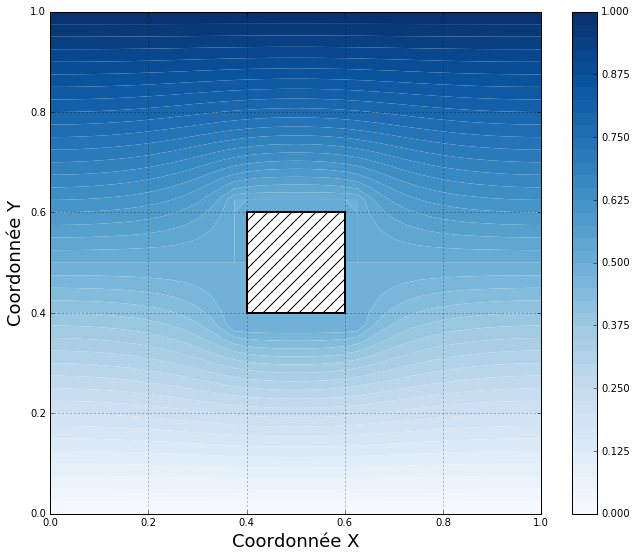

In [93]:
## =================================================================================
## Résolution du problème de l'écoulement de Stokes autour d'un obstacle carré
## =================================================================================


## 1. Initialisation
## -----------------
start_time = time.time()
print("Calculs en cours")

# Définition de la grille
# On opte pour un nombre pair de cellules !
Nx = 40 +1         # Nombre de cellules sur X + 1 (hauteur des matrices)
Ny = 40 +1         # Nombre de cellules sur Y + 1 (largeur des matrices)
Lx = 1.0           # Longueur [adimensionnelle] sur X
Ly = 1.0           # Longueur [adimensionnelle] sur Y
Dx = Lx/(Nx-1)     # Incrément sur X
Dy = Ly/(Ny-1)     # Incrément sur Y
tol = 10.**(-14)    # Erreur maximale autorisée
Ntot = 10**4       # Nombre d'itérations maximales (Inf si néant)

# Définition de l'obstacle 
Sx = 0.4*Lx        # Coordonnée X du sommet inférieur gauche
Sy = 0.4*Ly        # Coordonnée Y du sommet inférieur gauche
Tx = 0.6*Lx        # Coordonnée X du sommet supérieur droit
Ty = 0.6*Ly        # Coordonnée Y du sommet supérieur droit
# Index des sommets
X1 = int((Sx/Lx)*Nx) - 1  # Index du cube sur X    
X2 = int((Tx/Lx)*Nx) + 1
Y1 = int((Sy/Ly)*Ny) - 1  # Index du cube sur Y
Y2 = int((Ty/Ly)*Ny) + 1
# Le cube se trouve dans la surface (X1:X2)x(Y1:Y2)

# Vitesses horizontales des parois (> 0 vers les x > 0) [adimensionnelles]
UH = 1.0 # Vitesse de poussée des plaques latérales (= car incompressible)
UT = 1.0 # Vitesse tangentielle de la plaque supérieure (top)
UB = 1.0 # VItesse tangentielle de la plaque inférieure (bottom)

## 2. Définition des observables physiques
## ---------------------------------------

# Fonction de courant Psi(x,y) discrétisée sur la grille
Psi = numpy.zeros((Ny,Nx))
# Composante verticale w(x,y) de la vorticité discrétisée sur la grille
w = numpy.zeros((Ny,Nx))
w_maj = w.copy() # Matrice temporaire pour Jacobi

# Application des conditions aux bords sur la fonction de courant
for j in (0,Nx-1) :
    Psi[:,j] = UH*Dy*numpy.linspace(0,Ny-1,Ny) # Bords latéraux
Psi[0,:] = 0
Psi[-1,:] = UH*Ly
# Si UH = 0, on a bien Psi = 0 partout au début, notamment sur le bord.

# Récupération de la valeur de la fonction de courant
# sur l'axe de symétrie
Psi_axe = (0.5)*UH*Ly


# Position de l'obstacle --> pas d'écoulement à l'intérieur
# Le bord de ce dernier est le prolongement de la ligne de courant
# qui arrive au centre des faces latérales
# On applique la condition sur le bord
for i in (Y1,Y2) : # Haut/bas
    Psi[i,X1:X2+1] = Psi_axe  
for j in (X1,X2) : # Gauche/droite
    Psi[Y1:Y2+1,j] = Psi_axe
# Note : les +1 sont nécessaires à cause de la convention d'indices de Python

Psi_maj = Psi.copy() # Ces conditions sont valables aussi pour Psi

## 3. Méthode de Jacobi
## --------------------

L2err = 1 # Valeur initiale de l'erreur
erreur = numpy.zeros(Ntot)
k = 0 # Compteur d'itérations

while (L2err > tol and k < Ntot) :
    
    k = k + 1 
    
    # Conditions aux bords pour w
    
    # - Bordures supérieure et inférieure
    w_maj[Ny-1,:] = (-3*UT/Dy) + ((Psi[Ny-3,:] - 8*Psi[Ny-2,:] + 7*Psi[Ny-1,:])/(2*Dy**2))  # (B1)
    w_maj[0,:]  = (3*UB/Dy) + ((Psi[2,:] - 8*Psi[1,:] + 7*Psi[0,:])/(2*Dy**2)) # (B2)
    
    # - Bordures gauche et droite
    w_maj[:,0] = (Psi[:,2] - 8*Psi[:,1] + 7*Psi[:,0])/(2*Dx**2) # (B3)
    w_maj[:,Nx-1] = (Psi[:,Nx-3] - 8*Psi[:,Nx-2] + 7*Psi[:,Nx-1])/(2*Dx**2) # (B4)
     
    # - Bordures de l'obstacle
    for i in (Y1,Y2) : # Haut/bas
        w_maj[i,X1:X2+1] = ( (Psi[i+1,X1:X2+1] - 2*Psi[i,X1:X2+1] + Psi[i-1,X1:X2+1])/(Dy**2) ) + \
                            ( (Psi[i,X1+1:X2+2] - 2*Psi[i,X1:X2+1] + Psi[i,X1-1:X2])/(Dx**2) )
    for j in (X1,X2) : # Gauche/droite
        w_maj[Y1:Y2+1,j] = ( (Psi[Y1+1:Y2+2,j] - 2*Psi[Y1:Y2+1,j] + Psi[Y1-1:Y2,j])/(Dy**2) ) + \
                            ( (Psi[Y1:Y2+1,j+1] - 2*Psi[Y1:Y2+1,j] + Psi[Y1:Y2+1,j-1])/(Dx**2) )

    # Résolution de l'équation de Laplace pour w
    
    w_maj[1:-1,1:-1] = ((w[2:,1:-1] + w[:-2,1:-1])*Dy**2 + (w[1:-1,2:] + w[1:-1,:-2])*Dx**2) / \
        (2*(Dx**2 + Dy**2))
    
    L2errW = numpy.sqrt(numpy.sum((w_maj - w)**2))/(Nx*Ny) # Norme 2 de Delta(w)
    
    w = w_maj.copy() # Préparation de l'itéré suivant
            
    # Résolution de l'équation de Poisson pour Psi

    Psi_maj[1:-1,1:-1] = ( ((Psi[2:,1:-1] + Psi[:-2,1:-1])*Dy**2) + \
                            ((Psi[1:-1,2:] + Psi[1:-1,:-2])*Dx**2) + w[1:-1,1:-1]*(Dx*Dy)**2 ) \
                            / (2*(Dx**2 + Dy**2))

    # On réapplique les conditions au bord sur le carré (voir ci-dessus)
    for i in (Y1,Y2) : # Haut/bas
        Psi_maj[i,X1:X2+1] = Psi_axe  
    for j in (X1,X2) : # Gauche/droite
        Psi_maj[Y1:Y2+1,j] = Psi_axe
        
    L2errPsi = numpy.sqrt(numpy.sum((Psi_maj - Psi)**2))/(Nx*Ny) # Norme 2 de Delta(Psi)
    
    Psi = Psi_maj.copy() # Préparation de l'itéré suivant
    
    # Sortie de boucle
    L2err = max(L2errW,L2errPsi)
    erreur[k-1] = L2err


## 4. Graphiques et résultats
## --------------------------

# Sorties numériques
clear_output()
DeltaT = time.time() - start_time
print("\n1 - Temps total d'exécution : " + repr(DeltaT) + " secondes \n")
print("2 - Norme matricielle L2 de l'erreur numérique : " + repr(L2err) + "\n")
print("3 - Nombre d'itérations effectuées : " + repr(k) + "\n")

#Sortie graphique
print("4 - Lignes de courant : \n    -------------------")
x = numpy.linspace(0,Lx,Nx)
y = numpy.linspace(0,Ly,Ny)
niveau(x,y,Psi,40)
pyplot.grid('on')
currentAxis = pyplot.gca()
currentAxis.add_patch(Rectangle((Sx, Sy), (Tx-Sx), (Ty-Sy), \
    facecolor = 'white', linestyle = 'solid', hatch = '//', linewidth = 2 ))
pyplot.show()


5 - Erreur numérique : 
    ------------------



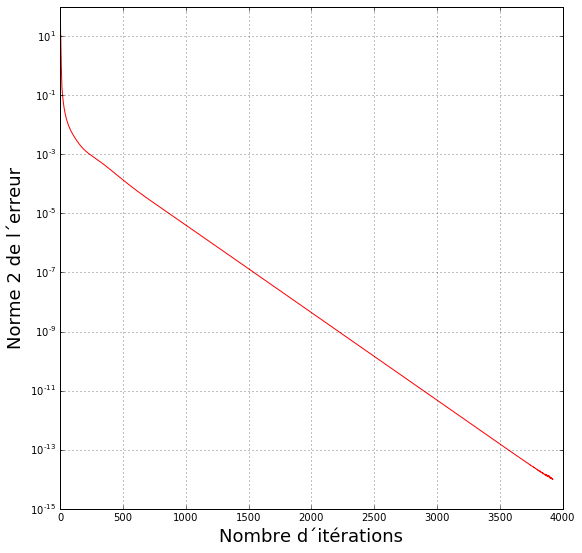

In [59]:
print("\n5 - Erreur numérique : \n    ------------------\n")
log_2D(numpy.arange(k)+1,erreur[:k])

<a id="Section23"></a>
### <i><font color="blue" face="arial">2.3 &emsp; Conclusions et perspectives</font></i>

Nous avons enfin obtenu la solution à notre problème. Nous remarquons bien sûr qu'il s'agit d'un _pattern_ extrêmement lisse, et qui vérifie toutes les propriétés de symétrie que l'on attend d'un écoulement à très faible nombre de Reynolds. En particulier, on remarque qu'il est impossible de connaître le sens absolu de la vitesse du fluide. En effet, si on renverse la vitesse asymptotique sur les bords (_i.e._ $U \rightarrow -U$) la figure que l'on obtient est identique ! Ce caractère propre à l'écoulement de Stokes, appelé _réversibilité_, est imputable à la structure linéaire des équations dynamiques qui, privées du terme advectif (qui apporte, rappelons-le, de la linéarité), se réduisent simplement à des systèmes différentiels de Poisson-Laplace pour lequel le _principe de superposition_ s'applique. Ceci ne contredit pas l'existence d'une solution _unique_ pour le problème de Stokes, vu que les conditions limites sélectionneront, dans l'espace vectoriel des champs de vitesse possibles, celui qui sera finalement observé en pratique, mais implique que si un champ de vitesse $\vec{u} (\vec{r})$ solutionne l'équation de Stokes, alors $-\vec{u} (\vec{r})$ est également une solution acceptable, à condition d'inverser les vitesses asymptotiques bien évidemment (le champ de vitesse doit être différentiable en tout point). Dans les conditions $Re \ll 1$, notre intuition est alors mise en défaut, car habituellement, lorsque nous observons des écoulements macroscopiques, la taille "énorme" des obstacles et les conditions de vitesse et de viscosité impliquent en général que $Re \gg 1$ et dans ce cas, un sillage turbulent permet, à coup sûr, de déterminer la vitesse de propagation de l'objet dans le fluide, ou réciproquement, la direction d'écoulement du fluide autour de l'objet fixe. Notons, en clin d'oeil, que cette particularité des écoulements de Stokes est un frein au mouvement aquatique des micro-organismes, dont la taille est suffisamment faible pour assurer $Re < 1$ en toutes circonstances. C'est ainsi que le spermatozoïde humain ou les planctons nagent en effectuant des mouvements hélicoïdaux au moyen de leur flagelle, une nage de type "poisson" en battant de la nageoire caudale leur étant rendue impossible (en effet, après un coup de nageoire, la réversibilité de l'écoulement du fluide autour d'eux ruine l'effort qui vient d'être produit, annulant ainsi le déplacement net) !

D'un point de vue algorithmique, la méthode que nous avons développée converge bel et bien, et atteint même une précision au-delà de $10^{-14}$ en norme $L2$ ce qui s'approche de manière assez satisfaisante de la précision machine pour les codes en double précision (qui est, rappelons-le, de l'ordre de la seixième décimale)... Nous avons pu constater que le positionnement des lignes qui appliquent les conditions de bord pour $\Psi$ sur l'obstacle avait son importance dans la convergence de l'algorithme. La structure finalement choisie optimise à la fois le temps de calcul et le rendu graphique. Nonobstant cela, le code tel quel n'est pas exempt de défauts. Le lecteur attentif aura constaté la présence de petites zones triangulaires mal définies autour du carré. Les responsables de leur apparition sont à la fois la contingence du calcul en précision finie sur ordinateur, et à la forme particulièrement anguleux de l'obstacle central. Enfin, il convient de mentionner que les conditions aux bords pour $\omega$ sur l'obstacle sont inopérantes : les supprimer du code ne modifie en rien la sortie graphique, ce qui, de prime abord, apparaît comme très contrariant. Dans le futur, il sera indispensable de comprendre pourquoi ces conditions restent inactives, alors qu'aucun motif valable (symétrie, nombre de degrés de liberté _versus_ contraintes...) ne peut être raisonnablement invoqué pour expliquer cette désagréable passivité !

En outre, nous avons déjà signalé que les conditions aux bords sur le carré central sont rajoutées ici de manière assez barbare et présuppose la symétrie de la solution. Nous avons par ailleurs exhibé une condition intégrale sur $\omega$ qui devrait être vérifiée en l'absence de force azimutale dans le problème (ce qui est le cas) et conduirait à un _pattern_ possédant la bonne symétrie, et ceci, sans avoir à fixer manuellement une valeur donnée pour $\Psi$ sur un axe-miroir du problème ! Dans la version de l'algorithme de Jacobi que nous avons implémentée, tenir compte d'une telle condition dans l'intégrateur-même est chose impossible, à moins de reformuler directement les équations de Poisson-Laplace sous forme matricielle (on rappelle que le laplacien discrétisé est la matrice tridiagonale $N_x \times N_y$ de séquence centrale $(-1,2,-1)$) et rajouter la relation intégrale discrétisée sous forme d'une ligne supplémentaire au système. Il faudrait alors ré-envisager l'algorithme de Jacobi sur cette matrice, ce qui, vous en conviendrez, est assez lourd ! Le temps nous manque désormais, et refondre le code au moyen d'une technique algorithmique plus appropriée ne sera pas réalisé dans le cadre de ce stage. Il faudrait par exemple faire appel à une méthode d'inversion du système formulé matriciellement, et prenant en compte la modification prescrite, qui soit plus performante que Jacobi. Nous opterions pour la méthode du gradient conjugué, tout à fait redoutable, et qui est par ailleurs bien connue de l'auteur. Il est de notoriété publique que cette technique, héritée des algorithmes d'optimisation numérique, permet souvent de raciner des systèmes de Laplace en une dizaine d'itérations ! Si ce n'est pas de la puissance, cela...

Nous clôturons donc ce texte, avec un sentiment trouble qui mêle à la fois la satisfaction du travail accompli et la frustration de l'interruption d'une oeuvre, faute de temps. Mais que tous se rassurent, nous n'abandonnerons pas en si bon chemin et promettons au lecteur, que nous espérons tout aussi passionné et curieux que nous, que nous donnerons suite à ce _notebook_ et présenterons une alternative de type _CGS_ à l'algorithme de Jacobi...

<hr class="cus">

## <font color="blue" face="arial"><b><center>Postface</center></b></font>

_Voici qui termine le second rapport de stage établi dans le but d'obtenir les crédits relatifs à l'unité d'enseignement PHYS-F436. L'auteur tient à exprimer tous ses remerciements, et sa profonde gratitude, à son maître de stage, Monsieur le Professeur_ **Bernard Knaepen** _pour la pédagogie, l'enthousiasme, et la disponibilité dont il a fait preuve dans la conduite de son stage, qui fut bref, mais intense ! Aussi compétent qu'attentionné à la bonne marche du projet, il prodigua à l'auteur de nombreux conseils, au cours de quelques visites impromptues dans son bureau, qui lui permirent d'avancer plus sûrement sur le chemin truffé d'embûches informatiques qui le séparaient de la réussite de son entreprise._ 

_Originellement, le sujet central du stage était le phénomène de portance. Tout naturellement a-t-on ajouté en marge de ce_ notebook _une série d'exercices et de problèmes, qui clôturent le chapitre 4 de l'excellent bouquin d'Acheson,_ Elementary Fluid Dynamics_, et qui ont été résolus après lecture de ce même chapitre, constituant ainsi un amusant préambule au stage proprement dit. Il convient finalement de mentionner comme partie intégrante du stage une petite rédaction sans prétention qui détaille à peu près tout ce qui peut être dit au sujet de la transformation de Joukovski, qui est d'une grande utilité dans le traitement exact et non-informatisé des diagrammes de lignes de courant autour d'objets immergés dans des fluides. Ce court manuscrit a été conçu à la demande expresse du maître de stage, qui souhaitait éclaircir certains points des mathématiques délicates qui se cachent insidieusement derrière cette transformation, et n'avait jamais trouvé de temps pour mener à bien cette investigation._

_Notons pour terminer qu'aucune référence n'a été signalée comme base de ce texte, étant donné que la seule véritable source des connaissances de l'auteur en la matière provient du cours de dynamique des fluides que son maître de stage avait magistralement dispensé au premier quadrimestre, et qui, semble-t-il, l'avait mis en appétance. Les quelques ouvrages de référence du cours, dont Acheson, avaient donc été abondamment consultés avant même le début du stage, mais plus vraiment par la suite. Il est donc inutile de dresser une bibliographie, qui, de toute manière, serait minimaliste._

<hr class="cus">

In [1]:
# Déclarations HTML pour le style
from IPython.core.display import HTML
HTML("<style> hr{border-top: 2px solid blue;} \
     hr.cus { border: 0; border-bottom: 1px dashed #ccc; background: #999; }\
     a.s{color: #000000;} \
     a.s:hover{color: #0000FF; background-color: #E6E6FA; border-bottom:1px solid; border-top:1px solid } \
     div.cell{ width:93%; margin-left:0%; margin-right:auto; font-family: 'Palatino Linotype', 'Book Antiqua', Palatino, serif; } <\style>")